# Assignment by Zainalysis



## Basic Descriptive Statistics

### Question: Calculate the mean, median, mode, range, variance, and standard deviation for the following dataset: [12, 15, 14, 10, 8, 11, 18, 14, 16, 19, 21]



#### Farmulas 
-Mean
$$
\text{Mean} = \frac{\sum{(x_i)}}{n}
$$
-Mode= The most frequent number in the dataset

-Median= Middle part of dataset (sort data, and get the middle value, in case of even dataset, average of middle two values is median)

-Range= Maximum Value-Minimum Value

-Variance
$$
\text{Variance} = \frac{\sum{(x_i - \mu)^2}}{n}
$$
-Standard Deviation
$$
\sigma = \sqrt{\frac{\sum{(x_i - \mu)^2}}{n}}
$$


In [1]:
#calculating mean
A= [12,15,14,10,8,11,18,14,16,19,21]
mean = sum(A)/len(A)

print("The mean of dataset is", mean)

The mean of dataset is 14.363636363636363


In [2]:
#calculating mode
import statistics
mode=statistics.mode(A)
print("The mode of dataset is", mode)

The mode of dataset is 14


In [3]:
#calculating median
import statistics
median=statistics.median(A)
print("The median of dataset is", median)

The median of dataset is 14


In [4]:
#calculating range
range=max(A)-min(A)
print("The range of dataset is", range)

The range of dataset is 13


In [5]:
#calculating variance 
var= statistics.variance(A)
print("the variance of dataset is", var)

the variance of dataset is 15.854545454545455


In [6]:
#calculating standard variance
S_D=statistics.pstdev(A)
print("The standard deviation of dataset is", S_D)

The standard deviation of dataset is 3.796475094149291


### Question: Create a frequency distribution table and histogram for the dataset above.

In [7]:
#creating frequency distribution using pandas
import pandas as pd

#let's make frequency distribution
frequency_distribution=pd.Series(A).value_counts().sort_index()

#let's give its columns a name
frequency_distribution_df=frequency_distribution.reset_index()
frequency_distribution_df.columns=['Data','Count']

#print the freuency distribution
print("frequency Distribution:")
print(frequency_distribution_df)

frequency Distribution:
   Data  Count
0     8      1
1    10      1
2    11      1
3    12      1
4    14      2
5    15      1
6    16      1
7    18      1
8    19      1
9    21      1


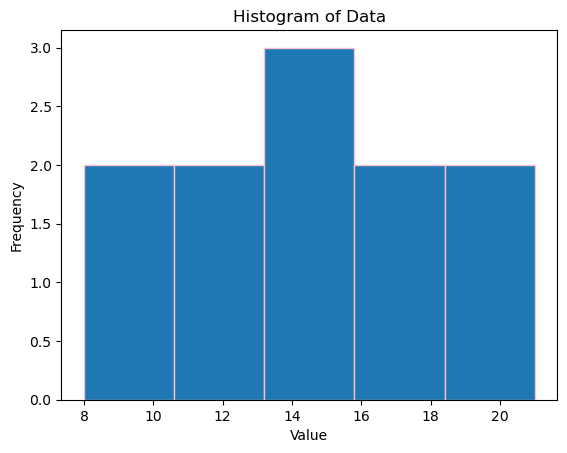

In [10]:
#creating histogram using matplotlib
import matplotlib.pyplot as plt

plt.hist(A, bins=5, edgecolor='pink')
plt.title("Histogram of Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


### Question: Calculate the 25th, 50th, and 75th percentiles for the dataset.

In [21]:
import numpy as np

# Data
A = [12, 15, 14, 10, 8, 11, 18, 14, 16, 19, 21]

# Calculate the 25th, 50th (median), and 75th percentiles
percentiles = np.percentile(A, [25, 50, 75])

# Print the result
print("25th percentile:", percentiles[0])
print("50th percentile (Median):", percentiles[1])
print("75th percentile:", percentiles[2])


25th percentile: 11.5
50th percentile (Median): 14.0
75th percentile: 17.0


## Section 2: Inferential Statistics

### Question: Conduct a t-test to compare two datasets: [23, 21, 25, 22, 27,29, 30] and [18, 20, 17, 19, 15, 22, 24]. Determine if there is a significant difference between them.



In [5]:
#it will be 2 sample t - test, as we have two independent samples from population
B= [23,21,25,22,27,29,30]
C= [18,20,17,19,15,22,24]

#we will be using scipy library for this test
from scipy.stats import ttest_ind

#performing t-test
t_stat, p_value = ttest_ind(B,C)

print("T_statistics:",t_stat)
print("p_value:", p_value)

T_statistics: 3.4254816613103327
p_value: 0.005027424730315605


In [9]:
#now let's interpret results from it
if p_value<0.5:
    print("reject the null hypothesis(means are significantly different)")

else:
    print("accept the alternative hypothesis(means are not significantly different)")

#Result: yes, there is significant difference between two datasets

reject the null hypothesis(means are significantly different)


### Question: Perform a chi-square test on the following contingency table:
| Category | A  | B  |
|----------|----|----|
| X        | 20 | 30 |
| Y        | 25 | 35 |


In [3]:
from scipy.stats import chi2_contingency
contingency_table = [
                    [20,30],
                    [25,35]
]

#let's perform chi_2 test

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("chi square statistics", chi2)
print("p_value", p)
print("degree of freedom", dof)
print("expected frequencies:",)
for row in expected:
    print(row)


chi square statistics 0.0
p_value 1.0
degree of freedom 1
expected frequencies:
[20.45454545 29.54545455]
[24.54545455 35.45454545]


### Question: Conduct a one-way ANOVA for the following groups: Group 1: [5, 7,9, 6, 8], Group 2: [10, 12, 11, 14, 13], Group 3: [15, 17, 16, 18, 19].

#### One- way Anova:
    "It is for one factor with atleast two independent levels"
- Null hyothesis = means of all groups is same
- Alternative hypothesis = atleast one sample mean is different

- F_factor=variance between sample / variance within sample

In [17]:
#let's solve this problem using scipy library

import scipy.stats as stats
import pandas as pd

data={
    "Group_1":[5,7,9,6,8],
    "Group_2":[10,12,11,14,13],
    "Group_3":[15,17,16,18,19]
}

df = pd.DataFrame(data)

#let's perform anova test

f_stats, p_value = stats.f_oneway(df["Group_1"], df["Group_2"], df["Group_3"])

print("F_statistic", f_stats)
print("P-value", p_value)

if p<0.05:
    print("null hypothesis is rejected, atleast one group mean is different")
else:
    print("null hypothesis is accepted, all means are same")

F_statistic 50.0
P-value 1.5127924217375409e-06
null hypothesis is accepted, all means are same


## Section 3: Regression Analysis

### Question: Perform a simple linear regression using the following dataset:
X = [1, 2, 3, 4, 5, 6, 7]
Y = [2, 4, 5, 4, 6, 8, 9]


#### Linear Regression Model:
is a statistic medthod to establish a relationship between one or more independent variable (input)(X) and a dependent varoiable (output)(Y), by fitting a linear equation to the data.



Slope: 1.071428571428571
Intercept: 1.142857142857145


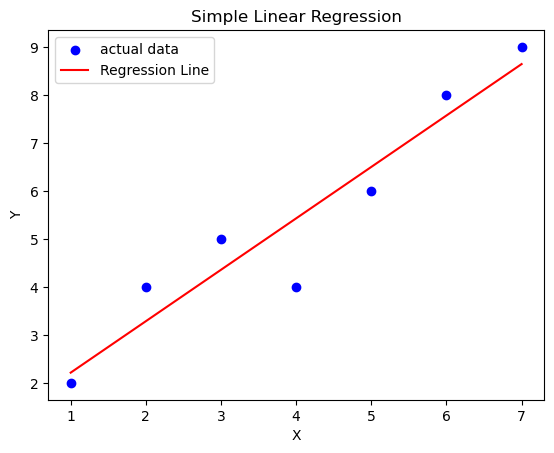

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#let's get data
#we will convert input(independent) into 2D
X=np.array([1,2,3,4,5,6,7]).reshape(-1,1)
Y=np.array([2,4,5,4,6,8,9])


#now perform LinearRegression
model = LinearRegression()
model.fit(X,Y)

slope=model.coef_[0]
intercept=model.intercept_

print("Slope:", slope)
print("Intercept:", intercept)

Y_pred = model.predict(X)

#let's visualize it
plt.scatter(X,Y, color="blue", label="actual data")
plt.plot(X, Y_pred, color="red", label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


### Question: Evaluate the goodness of fit for the regression model by calculating R-squared.

#### The R-squared value (coefficient of determination) measures how well the regression model fits the data.

#### Formula for R-squared
$$
\[
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
\]
$$
Where:
$$
\(SS_{\text{res}} = \sum (Y_i - \hat{Y}_i)^2\): Residual Sum of Squares (unexplained variance).
$$
$$
\(SS_{\text{tot}} = \sum (Y_i - \bar{Y})^2\): Total Sum of Squares (total variance).
$$
$$
\(\hat{Y}_i\): Predicted values.
$$
$$
\(\bar{Y}\): Mean of actual \(Y\).
$$

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression

#let's get data
#we will convert input(independent) into 2D
X=np.array([1,2,3,4,5,6,7]).reshape(-1,1)
Y=np.array([2,4,5,4,6,8,9])


#now perform LinearRegression
model = LinearRegression()
model.fit(X,Y)

# Predicted values
Y_pred = model.predict(X)

#calculate R-squared manually

SS_res = np.sum((Y-Y_pred)**2) #residual sum of squares
SS_tot = np.sum((Y-np.mean(Y))**2) #total sum of squares
R_squared=1-(SS_res/SS_tot)

R_squared_sklearn = model.score(X, Y)

#now print the results
print("R_squared_value_manual:", R_squared)
print("R_squared_sklearn:", R_squared_sklearn)

R_squared_value_manual: 0.9
R_squared_sklearn: 0.9


### Question: Implement multiple linear regression with the following dataset:
X1 = [1, 2, 3, 4, 5],
X2 = [5, 3, 6, 7, 8],
Y = [10, 12, 14, 15, 17]

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Dataset
X1 = [1, 2, 3, 4, 5]
X2 = [5, 3, 6, 7, 8]
Y = [10, 12, 14, 15, 17]

# Prepare the feature matrix (X) and target vector (Y)
X = np.array([X1, X2]).T  # Combine X1 and X2 into a 2D array
Y = np.array(Y)

# Create and train the model
model = LinearRegression()
model.fit(X, Y)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions
predictions = model.predict(X)
print("Predictions:", predictions)


Coefficients: [ 1.78333333 -0.08333333]
Intercept: 8.733333333333333
Predictions: [10.1        12.05       13.58333333 15.28333333 16.98333333]


## Section 4: Advanced Topics


### Question: Perform a logistic regression analysis for the following binary classification dataset:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Y = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


#### Logistic Regression:
    It is a statistical model used for binary classification problems, where the outcome or target variable is categorical and has two possible outcomes (e.g., 0 or 1, Yes or No, True or False). It is used to predict the probability that a given input point belongs to one of the two categories.

Model coefficients: [[1.16075451]]
Intercept: [-4.03332856]
Accuracy: 1.0


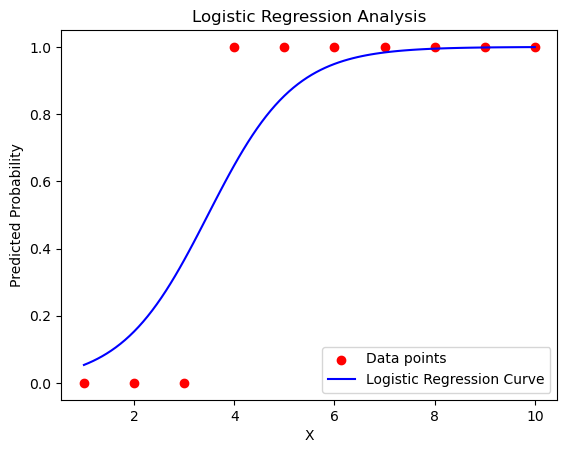

In [32]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#let's get data
#we will convert input(independent) into 2D
X=np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1,1)
Y=np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])


# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X, Y)

# Predict probabilities
predictions = model.predict(X)

# Display the model's coefficients (weights)
print("Model coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Accuracy score
accuracy = accuracy_score(Y, predictions)
print("Accuracy:", accuracy)

# Generate values for the curve
X_test = np.linspace(1, 10, 100).reshape(-1, 1)
Y_prob = model.predict_proba(X_test)[:, 1]

# Plot the results
plt.scatter(X, Y, color='red', label='Data points')
plt.plot(X_test, Y_prob, color='blue', label='Logistic Regression Curve')
plt.xlabel('X')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Analysis')
plt.legend()
plt.show()



### Question: Conduct a principal component analysis (PCA) for the following matrix:
Matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]


In [28]:
import numpy as np
from sklearn.decomposition import PCA

matrix = np.array([[1,2,3],
          [4,5,6],
          [7,8,9],
          [10,11,12]])

pca=PCA(n_components=2)
principal_components=pca.fit_transform(matrix)

# let's print output results
print("Original Matrix:")
print(matrix)
print("\nPrincipal Components (Reduced Matrix):")
print(principal_components)
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)
print("\nSingular Values:")
print(pca.singular_values_)

Original Matrix:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Principal Components (Reduced Matrix):
[[-7.79422863e+00  4.41704682e-16]
 [-2.59807621e+00 -1.20464913e-16]
 [ 2.59807621e+00  1.20464913e-16]
 [ 7.79422863e+00  3.61394740e-16]]

Explained Variance Ratio:
[1.00000000e+00 2.62765018e-33]

Singular Values:
[1.16189500e+01 5.95594472e-16]


### Question: Implement k-means clustering for the following dataset:
X = [[1, 2], [2, 3], [3, 4], [8, 9], [9, 10], [10, 11]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


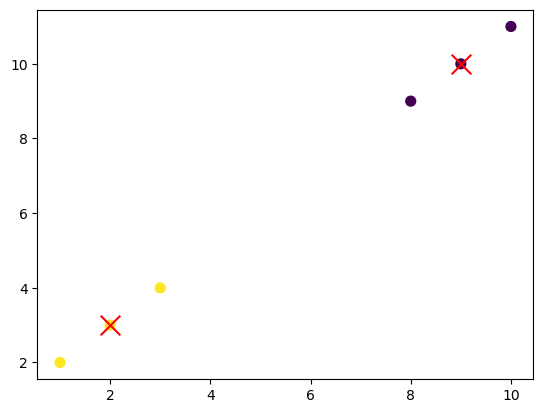

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = np.array([[1, 2], [2, 3], [3, 4], [8, 9], [9, 10], [10, 11]])

#let's apply clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Get cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the data points and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x')
plt.show()
